<a href="https://colab.research.google.com/github/aparnaashok2125/Osteoporosis-Risk-Prediction/blob/main/Osteoporosis_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Osteoporosis Risk Prediction

The aim of this project is to predict the risk of osteoporosis in patients using a dataset of patients' medical records. Osteoporosis is a condition that weakens bones, making them fragile and more likely to break. It develops slowly over several years and is often only diagnosed when a minor fall or sudden impact causes a bone fracture. The condition is more common in older people, particularly.

### About the dataset
The dataset offers comprehensive information on health factors influencing osteoporosis development, including demographic details, lifestyle choices, medical history, and bone health indicators. It aims to facilitate research in osteoporosis prediction, enabling machine learning models to identify individuals at risk. Analyzing factors like age, gender, hormonal changes, and lifestyle habits can help improve osteoporosis management and prevention strategies.

### Data Dictionary
| Column | Description |
| --- | --- |
|ID| Unique identifier for each patient|
|Age| Age of the patient|
|Gender| Gender of the patient|
|Hormonal Changes| Whether the patient has undergone hormonal changes|
|Family History with Osteoporosis| Whether the patient has a family history of osteoporosis|
|Race/Ethnicity| Race or ethnicity of the patient|
|Body Weight| Weight details of the patient|
|Calcium| Calcium levels in the patient's body|
|Vitamin D| Vitamin D levels in the patient's body|
|Physical Activity| Physical activity details of the patient|
|Smoking| Whether the patient smokes|
|Alcohol Consumption| Whether the patient consumes alcohol|
|Medical Conditions| Medical conditions of the patient|
|Medication| Medication details of the patient|
|Prior Fracture| Whether the patient has had a prior fracture|
|Osteoporosis| Whether the patient has osteoporosis|

### Potential analysis in this project
- **Predictive Modeling**: Develop machine learning models to predict the probability of osteoporosis based on the provided features. This analysis is crucial for identifying individuals at risk of osteoporosis, enabling early intervention and prevention strategies.

- **Feature Importance Analysis**: Determine the importance of each feature in predicting osteoporosis risk. Understanding which factors have the most significant impact on osteoporosis risk can provide insights into the underlying mechanisms and guide targeted interventions.

- **Correlation Analysis**: Examine correlations between different features and osteoporosis risk. Identifying strong correlations can help identify potential risk factors or associations that may warrant further investigation or intervention.

- **Subgroup Analysis**: Analyze how osteoporosis risk varies across different subgroups based on demographics, lifestyle factors, or medical history. Understanding how risk factors interact within different population groups can inform personalized approaches to osteoporosis prevention and management.

- **Model Interpretation**: Interpret the trained models to understand how different features contribute to osteoporosis risk prediction. This analysis can provide insights into the underlying relationships between variables and help healthcare professionals make informed decisions regarding patient care and management strategies.


In [ ]:
#importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Loading the dataset
df = pd.read_csv("osteoporosis.csv")
df.head()

,Id,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
0,104866,69,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,Corticosteroids,Yes,1
1,101999,32,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,No,NaN,NaN,NaN,Yes,1
2,106567,89,Female,Postmenopausal,No,Caucasian,Normal,Adequate,Sufficient,Active,No,Moderate,Hyperthyroidism,Corticosteroids,No,1
3,102316,78,Female,Normal,No,Caucasian,Underweight,Adequate,Insufficient,Sedentary,Yes,NaN,Rheumatoid Arthritis,Corticosteroids,No,1
4,101944,38,Male,Postmenopausal,Yes,African American,Normal,Low,Sufficient,Active,Yes,NaN,Rheumatoid Arthritis,NaN,Yes,1


## Data Preprocessing Part 1

In [ ]:
#checking the shape of the dataset
df.shape

(1958, 16)

In [ ]:
#checking the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1958 entries, 0 to 1957
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Id                   1958 non-null   int64 
 1   Age                  1958 non-null   int64 
 2   Gender               1958 non-null   object
 3   Hormonal Changes     1958 non-null   object
 4   Family History       1958 non-null   object
 5   Race/Ethnicity       1958 non-null   object
 6   Body Weight          1958 non-null   object
 7   Calcium Intake       1958 non-null   object
 8   Vitamin D Intake     1958 non-null   object
 9   Physical Activity    1958 non-null   object
 10  Smoking              1958 non-null   object
 11  Alcohol Consumption  970 non-null    object
 12  Medical Conditions   1311 non-null   object
 13  Medications          973 non-null    object
 14  Prior Fractures      1958 non-null   object
 15  Osteoporosis         1958 non-null   int64 
dtypes: int

Few columns have missing values, so before proceeding with the analysis, I will first handle the missing values in the dataset.

In [ ]:
#columns with missing values
columns_with_missing_values = df.columns[df.isnull().any()]

#missing value percentage
print("Missing value percentage")
for column in columns_with_missing_values:
    print(column,":",df[column].isnull().sum()/df.shape[0]*100)

Missing value percentage
Alcohol Consumption : 50.45965270684371
Medical Conditions : 33.04392236976506
Medications : 50.30643513789581


Alcohol Consumption and Medications columns have more than 50% missing values, I will be replacing these missing values with "None" as it is possible that the patient does not consume alcohol or take any medications. The same goes for the Medical Conditions column.

However, the columns with more than 50% missing values might not be much useful for the analysis, but still I am keeping them for the remaining 50% of the data.

In [ ]:
#replace missing values with "None"
df.fillna("None",inplace=True)

The column ID is an identifier and irrelevant for the analysis, so I will drop this column.

In [ ]:
df = df.drop(['Id'], axis=1)

In [ ]:
#value counts of categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    print(df[column].value_counts())

Gender
Male      992
Female    966
Name: count, dtype: int64
Hormonal Changes
Normal            981
Postmenopausal    977
Name: count, dtype: int64
Family History
No     998
Yes    960
Name: count, dtype: int64
Race/Ethnicity
African American    681
Caucasian           646
Asian               631
Name: count, dtype: int64
Body Weight
Normal         1027
Underweight     931
Name: count, dtype: int64
Calcium Intake
Low         1004
Adequate     954
Name: count, dtype: int64
Vitamin D Intake
Sufficient      1011
Insufficient     947
Name: count, dtype: int64
Physical Activity
Active       1021
Sedentary     937
Name: count, dtype: int64
Smoking
Yes    982
No     976
Name: count, dtype: int64
Alcohol Consumption
None        988
Moderate    970
Name: count, dtype: int64
Medical Conditions
Hyperthyroidism         678
None                    647
Rheumatoid Arthritis    633
Name: count, dtype: int64
Medications
None               985
Corticosteroids    973
Name: count, dtype: int64
Prior Fract

Descriptive Statistics

In [ ]:
df.describe()

,Age,Osteoporosis
count,1958.000000,1958.000000
mean,39.101124,0.500000
std,21.355424,0.500128
min,18.000000,0.000000
25%,21.000000,0.000000
50%,32.000000,0.500000
75%,53.000000,1.000000
max,90.000000,1.000000


In [ ]:
df.head()

,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
0,69,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,Corticosteroids,Yes,1
1,32,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,No,None,None,None,Yes,1
2,89,Female,Postmenopausal,No,Caucasian,Normal,Adequate,Sufficient,Active,No,Moderate,Hyperthyroidism,Corticosteroids,No,1
3,78,Female,Normal,No,Caucasian,Underweight,Adequate,Insufficient,Sedentary,Yes,None,Rheumatoid Arthritis,Corticosteroids,No,1
4,38,Male,Postmenopausal,Yes,African American,Normal,Low,Sufficient,Active,Yes,None,Rheumatoid Arthritis,None,Yes,1


## Exploratory Data Analysis

In the exploratory data analysis, I will be looking at the distribution of the data acroos all the variables and relationships between the variables and the target variable. For this I will be plotting the dataset variables in different graphs and draw out insights from them

### Target Variable Distribution

Text(0.5, 1.0, 'Osteoporosis')

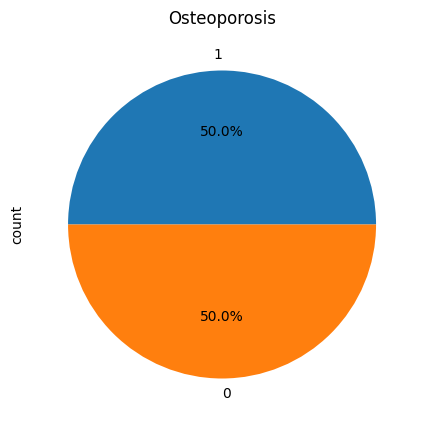

In [ ]:
#pie chart for the target variable (Osteoporosis)
plt.figure(figsize=(5,5))
df['Osteoporosis'].value_counts().plot.pie(autopct='%1.1f%%').set_title('Osteoporosis')

The above pie chart shows that the dataset is perfectly balanced with 50% of the patients having osteoporosis and 50% not having osteoporosis, which means that the dataset is not biased towards any class.

### Age and Osteoporosis

Text(0.5, 1.0, 'Osteoporosis by Age')

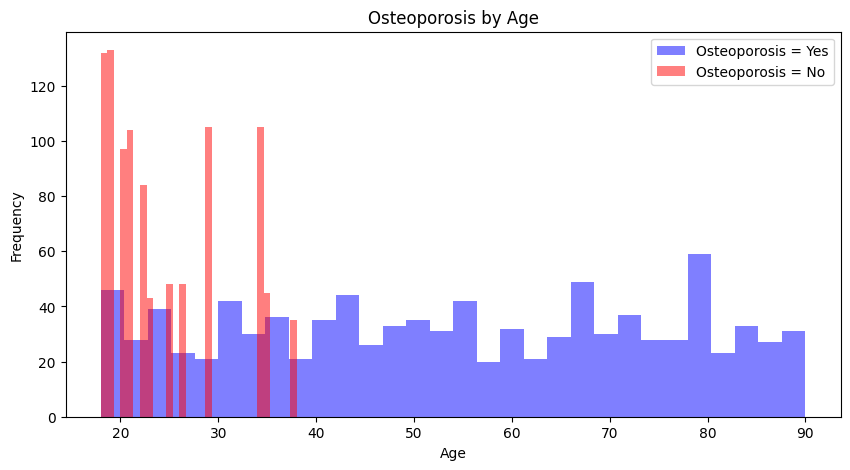

In [ ]:
#two layer histogram for the Age and Osteoporosis
plt.figure(figsize=(10,5))
df[df['Osteoporosis']==1]['Age'].plot.hist(bins=30, alpha=0.5, color='blue', label='Osteoporosis = Yes')
df[df['Osteoporosis']==0]['Age'].plot.hist(bins=30, alpha=0.5, color='red', label='Osteoporosis = No')

#legends and title
plt.legend()
plt.xlabel('Age')
plt.title('Osteoporosis by Age')

This graph shows relation between the risk of osteoporosis and the age of the patient. In the graph we can see that that there is significant risk of osteoporosis in patients of all ages but patients between the ages 20 to 40 have significantly much lower risk of osteoporosis. This highlights that fact that younger patients are less likely to have osteoporosis.

### Gender and Osteoporosis

Text(0.5, 1.0, 'Gender vs Osteoporosis')

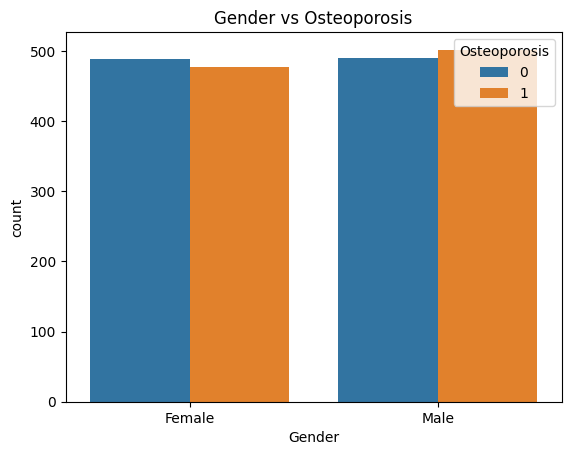

In [ ]:
sns.countplot(x='Gender', data=df, hue='Osteoporosis').set_title('Gender vs Osteoporosis')

In this graph, we can visualize the relationship between gender and the risk of osteoporosis. The graph shows that there is no concrete relationship between gender and the risk of osteoporosis, however, according to the numbers in the dataset, the males tend to have slightly higher number of osteoporosis cases than females, but the difference is not significant. Therefore, gender could be a weak predictor for osteoporosis.

### Hormonal Changes and Osteoporosis

Text(0.5, 1.0, 'Hormonal changes and Osteoporosis')

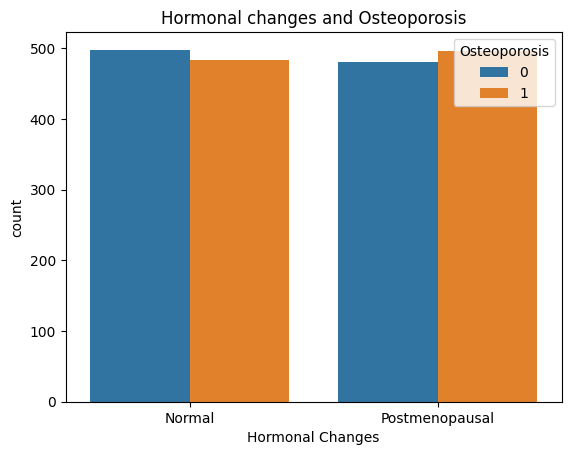

In [ ]:
#hormonal changes and Osteoporosis
sns.countplot(x='Hormonal Changes',data=df,hue='Osteoporosis').set_title('Hormonal changes and Osteoporosis')

*Note: Here Postmenopausal is not only for females, but it also reflects the cap on testosterone production in males, therefore for both genders, the hormonal changes are termed as postmenopausal.*

The graph shows that patients who have undergone hormonal changes have a higher risk of osteoporosis than those who have not undergone hormonal changes. This indicates that hormonal changes can be a significant risk factor for osteoporosis. This highlights that our hormones contribute in making our bones strong

### Family History and Osteoporosis

Text(0.5, 1.0, 'Family History and Osteoporosis')

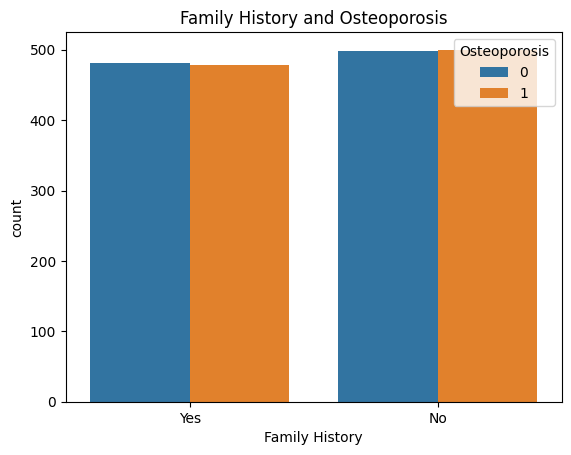

In [ ]:
sns.countplot(x = "Family History", data = df, hue = "Osteoporosis").set_title("Family History and Osteoporosis")

It is believed that genetics play a important role in the development of a disease. The graph shows the relationship between family history of osteoporosis and the risk of osteoporosis. But in the graph there is not much differnece in both cases regarding the risk of osteoporosis. Therefore, family history couldn;t be considered a predictor for osteoporosis.

### Race/Ethnicity and Osteoporosis

Text(0.5, 1.0, 'Race/Ethnicity and Osteoporosis')

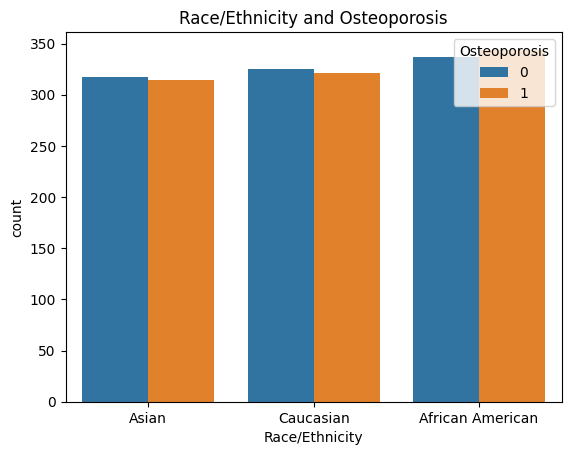

In [ ]:
sns.countplot(x="Race/Ethnicity", data = df, hue = "Osteoporosis").set_title("Race/Ethnicity and Osteoporosis")

This graph shows the relationship between Race/Ethnicity and the risk of osteoporosis. The graph shows that the risk of osteoporosis is almost similar with no concrete relationship between the race and risk of osteoporosis.

### Body Weight and Osteoporosis

Text(0.5, 1.0, 'Body Weight and Osteoporosis')

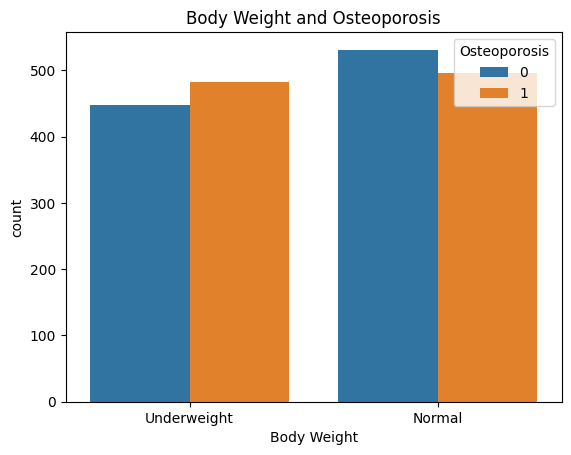

In [ ]:
sns.countplot(x="Body Weight", data = df, hue = "Osteoporosis").set_title("Body Weight and Osteoporosis")

Body weight is an important factor in determining the risk of osteoporosis. The graph shows that patients with lower body weight have a higher risk of osteoporosis than those with higher body weight. This indicates that body weight can be a significant risk factor for osteoporosis. This highlights that our body weight contributes in making our bones strong.

### Nutrition and Osteoporosis

Text(0.5, 1.0, 'Vitamin D Intake and Osteoporosis')

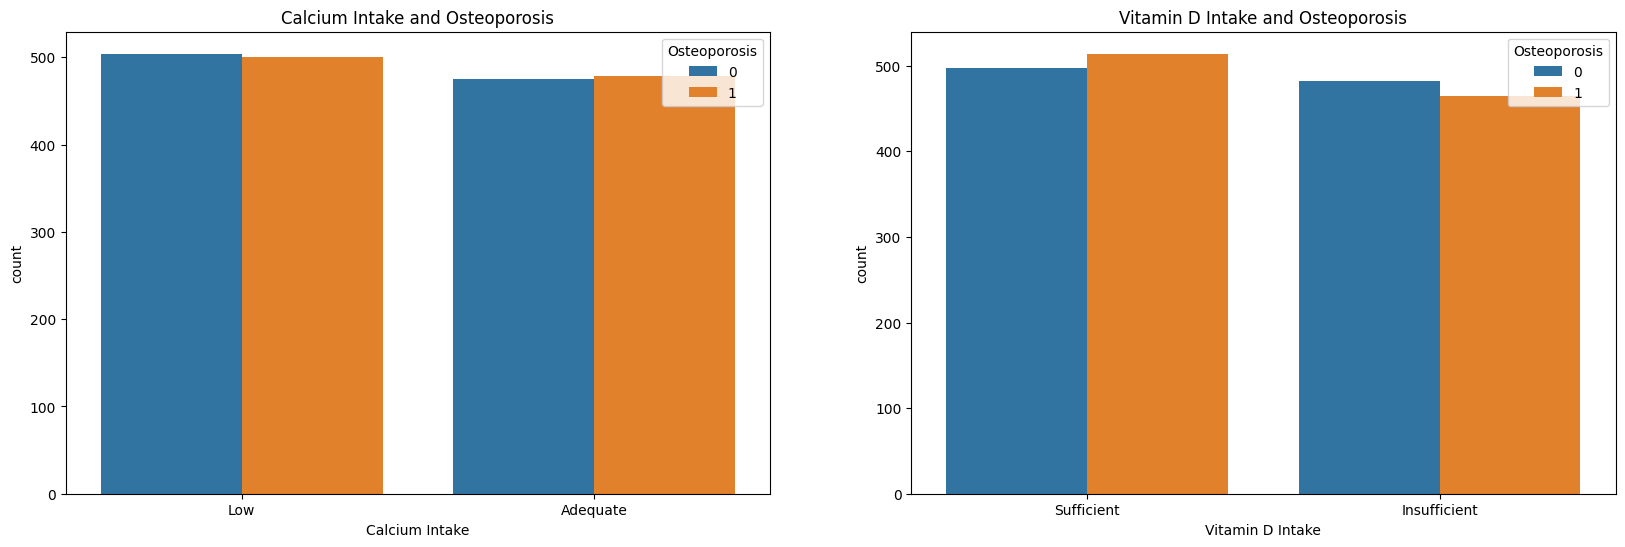

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))
sns.countplot(x='Calcium Intake', data=df, ax=ax[0], hue='Osteoporosis').set_title('Calcium Intake and Osteoporosis')
sns.countplot(x='Vitamin D Intake', data=df, ax=ax[1], hue='Osteoporosis').set_title('Vitamin D Intake and Osteoporosis')

Nutrition and Osteoporosis are closely related. The graph shows that patients with lower calcium and vitamin D levels have a higher risk of osteoporosis than those with higher calcium and vitamin D levels. This indicates that nutrition can be a significant risk factor for osteoporosis. This highlights that our nutrition contributes in making our bones strong.

### Physical Activity and Osteoporosis

Text(0.5, 1.0, 'Physical Activity and Osteoporosis')

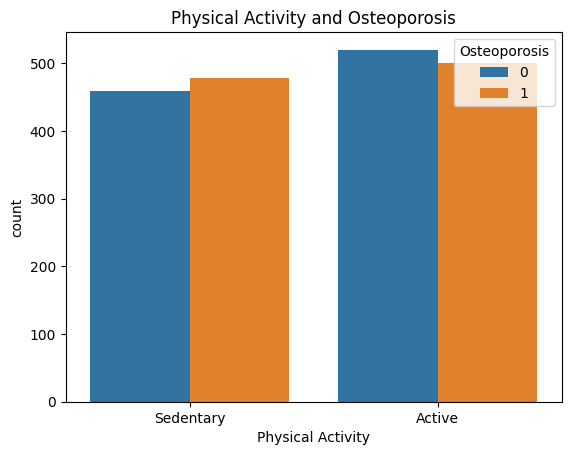

In [ ]:
sns.countplot(x='Physical Activity', data=df, hue='Osteoporosis').set_title('Physical Activity and Osteoporosis')

Physical Activity and Osteoporosis have a relation between them. The graph shows that patients with active physical acitve lifestyle lower risk of osteoporosis as compared to the patients with sedentary lifestyle.

### Smoking and Alcohol Consumption and Osteoporosis

Text(0.5, 1.0, 'Alcohol Consumption and Osteoporosis')

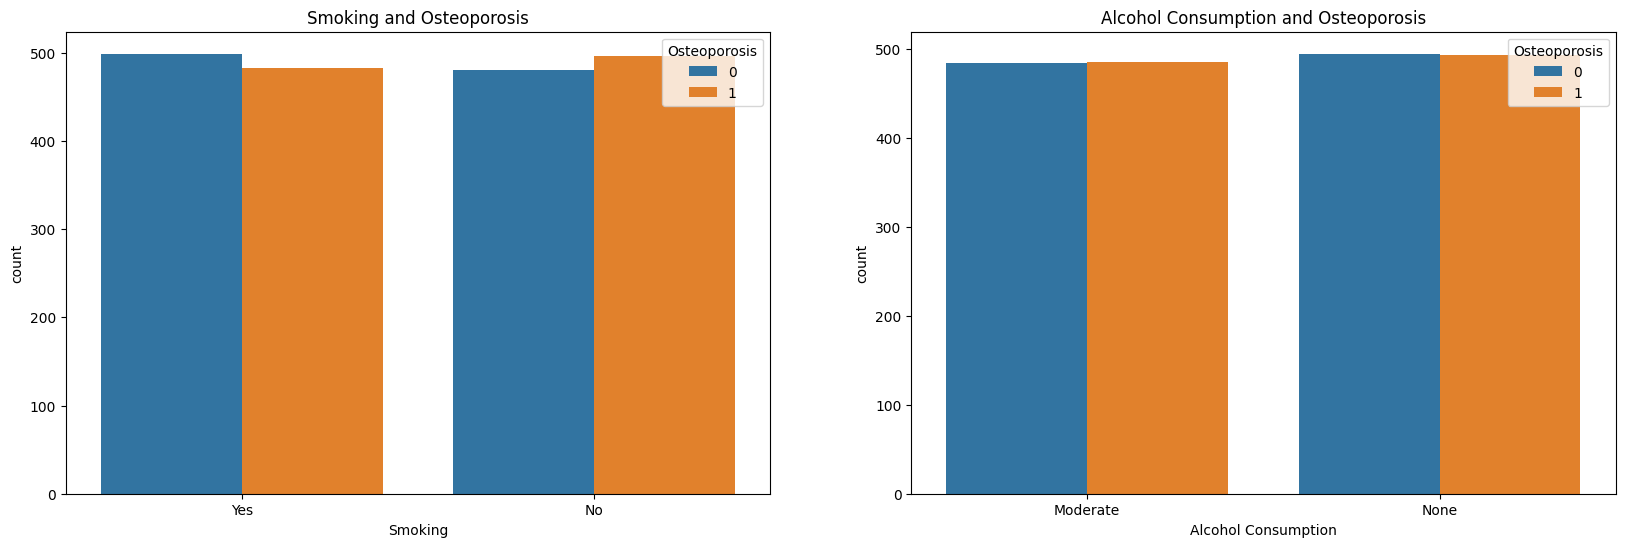

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))
sns.countplot(x='Smoking', data=df, ax=ax[0], hue='Osteoporosis').set_title('Smoking and Osteoporosis')
sns.countplot(x='Alcohol Consumption', data=df, ax=ax[1], hue='Osteoporosis').set_title('Alcohol Consumption and Osteoporosis')

Smoking and Alcohol Consumption are one of those factors that could have adverse effect on a patients health. Here, the graph shows that patients who smoke and consume alcohol does not relate to the risk of osteoporosis. This indicates that smoking and alcohol consumption are not significant risk factors for osteoporosis.

### Medical Conditions and Medications and Osteoporosis

Text(0.5, 1.0, 'Medications and Osteoporosis')

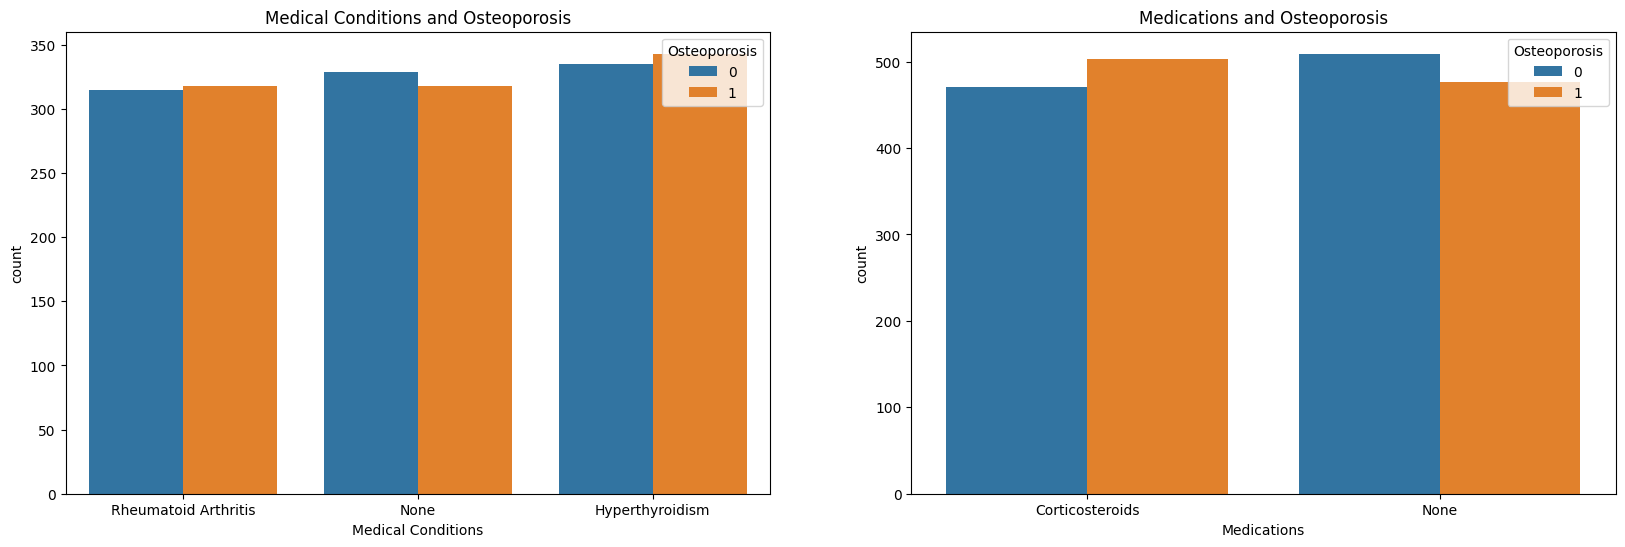

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))
sns.countplot(x='Medical Conditions', data=df, ax=ax[0], hue='Osteoporosis').set_title('Medical Conditions and Osteoporosis')
sns.countplot(x='Medications', data=df, ax=ax[1], hue='Osteoporosis').set_title('Medications and Osteoporosis')

The graph shows that patients with medical conditions like Hyperthyroidism have a higher risk of osteoporosis than those without medical conditions. This indicates that medical conditions can be a significant risk factor for osteoporosis. In addition to that patients who consume medications like Corticosteriods have higher risk of osteoporosis.

### Prior Fracture and Osteoporosis

Text(0.5, 1.0, 'Prior Fractures and Osteoporosis')

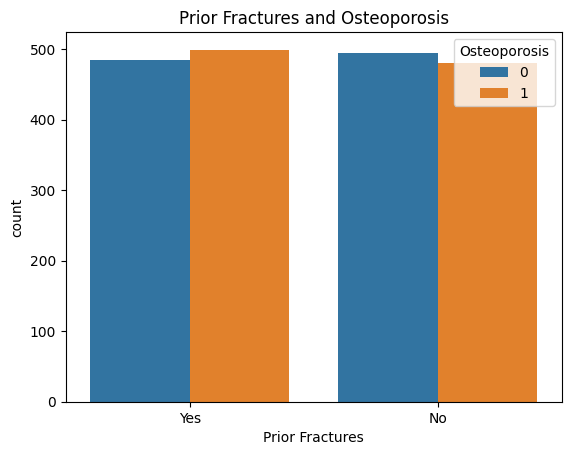

In [ ]:
sns.countplot(x='Prior Fractures', data=df, hue='Osteoporosis').set_title('Prior Fractures and Osteoporosis')

This graph shows the relation between the prior incident of fractures and risk of osteoporosis and from the graph it is clear that there is no concrete relationship between the prior incident of fractures and risk of osteoporosis.

## Data Preprocessing Part 2

#### Label Encoding the Categorical Variables

In [ ]:
#columns for label encoding
cols = df.select_dtypes(include=['object']).columns

#label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in cols:
    df[col] = le.fit_transform(df[col])
    print(col,":",df[col].unique())

Gender : [0 1]
Hormonal Changes : [0 1]
Family History : [1 0]
Race/Ethnicity : [1 2 0]
Body Weight : [1 0]
Calcium Intake : [1 0]
Vitamin D Intake : [1 0]
Physical Activity : [1 0]
Smoking : [1 0]
Alcohol Consumption : [0 1]
Medical Conditions : [2 1 0]
Medications : [0 1]
Prior Fractures : [1 0]


## Correlation Matrix Heatmap

<Axes: >

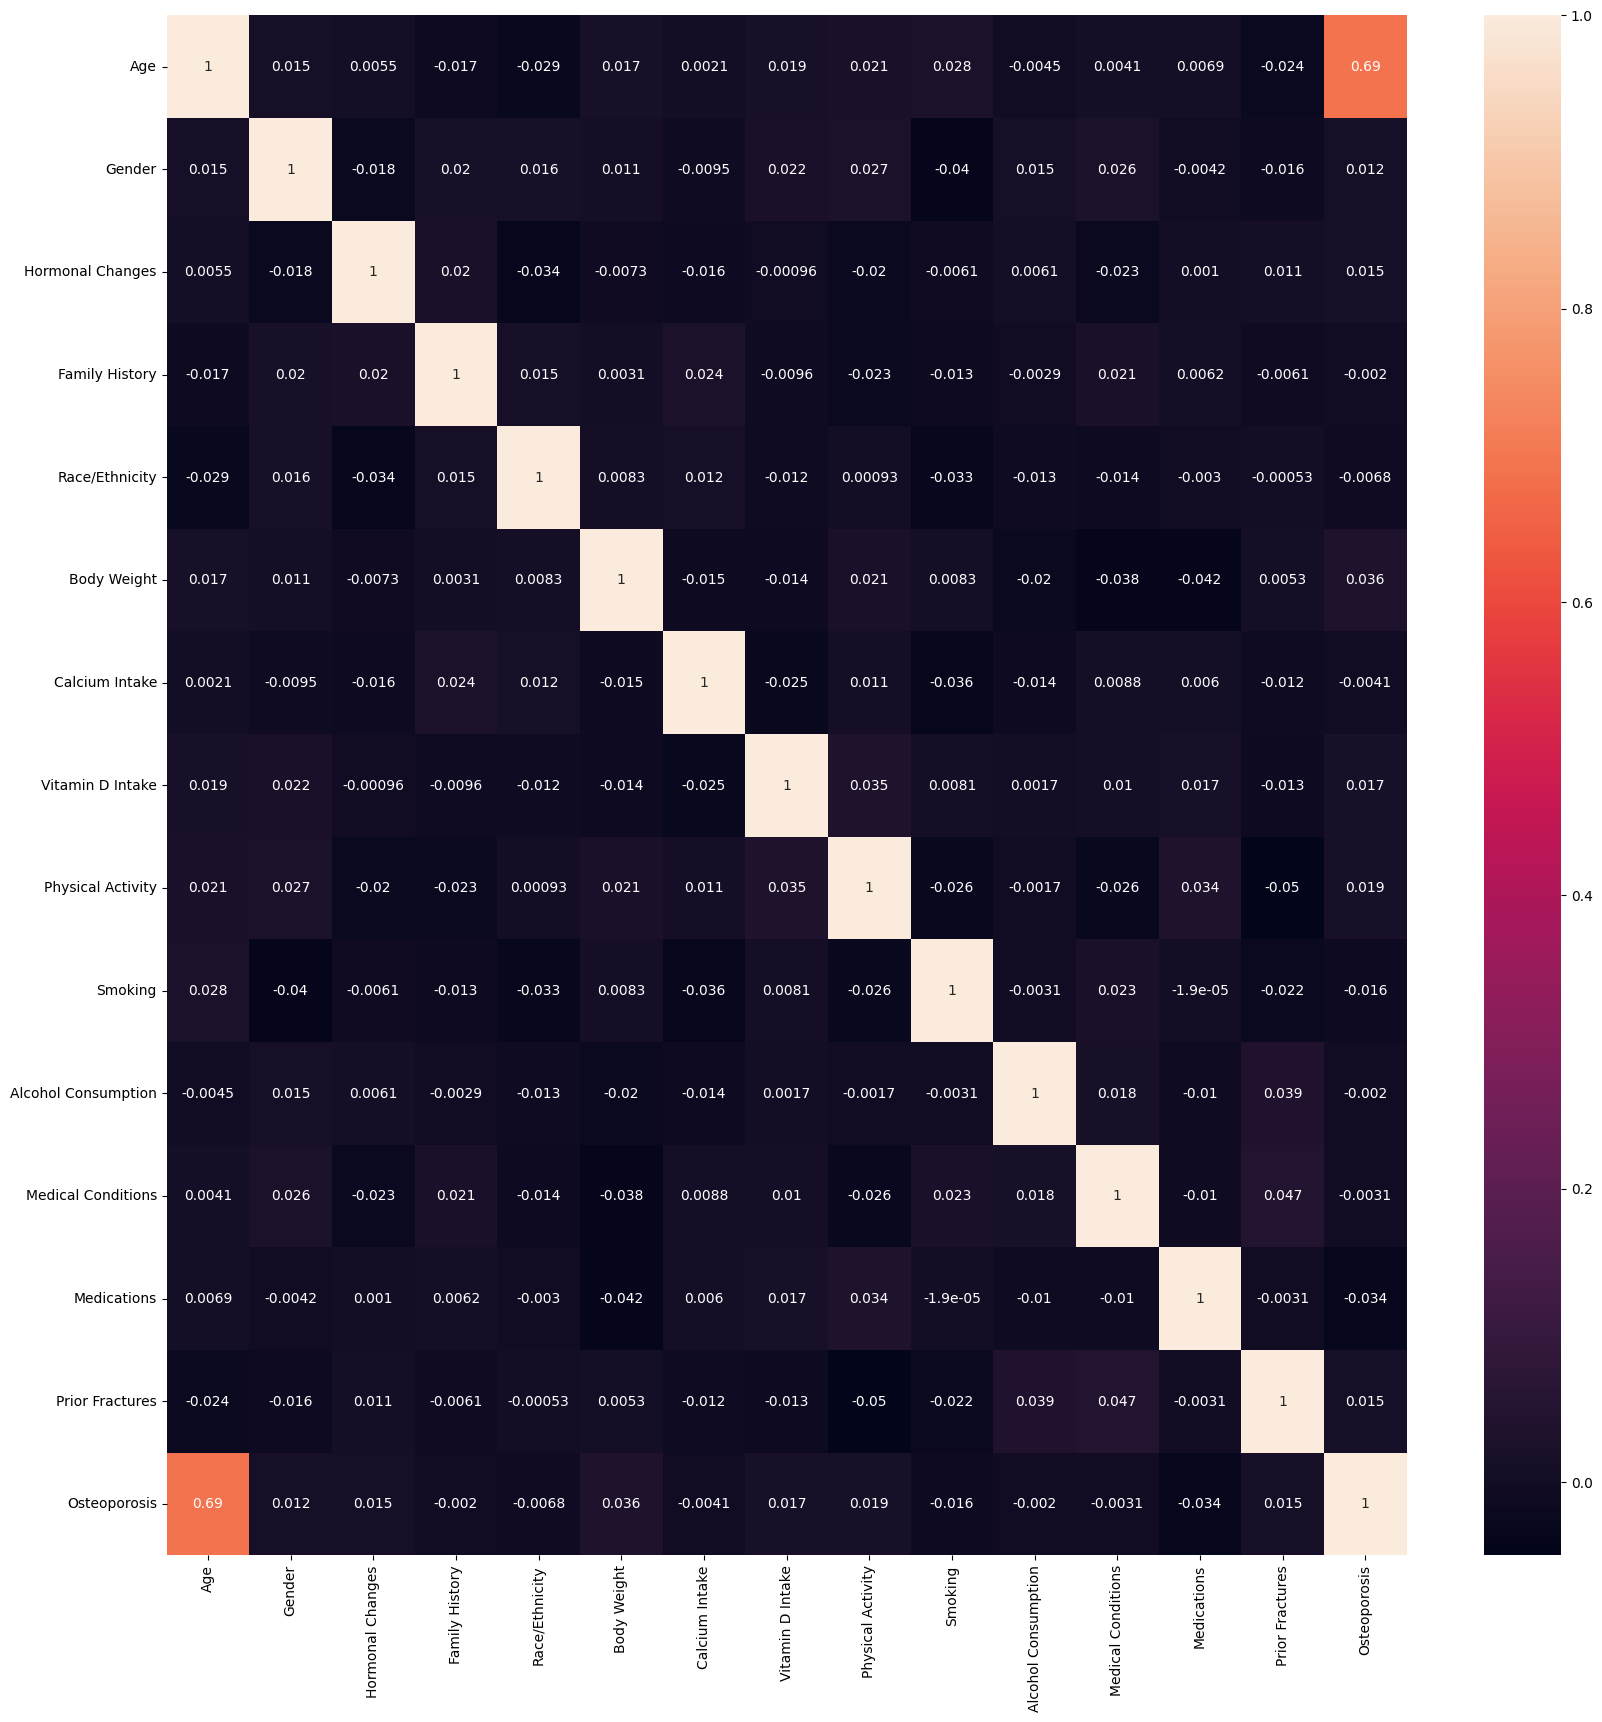

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)

## Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Osteoporosis',axis=1), df['Osteoporosis'], test_size=0.30, random_state=101)

## Ostheoporosis Risk Prediction Models

For predicting the risk of osteoporosis, I will be using the following models:
- Logistic Regression
- Random Forest Classifier
- Decision Tree Classifier
- Support Vector Classifier

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

#creating logistic regression object
logmodel = LogisticRegression()


#### Hyperparameter Tuning using GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

#parameters for grid search
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'penalty': ['l1', 'l2'],
              'solver': ['liblinear'],
              'max_iter': [100, 1000, 2500, 5000],
              'multi_class': ['auto', 'ovr'],
              'random_state': [0,42,101]}

#grid search object
grid = GridSearchCV(logmodel,param_grid,refit=True,verbose=3,cv=5,n_jobs=-1)

#fitting the data
grid.fit(X_train,y_train)

#best parameters
print(grid.best_params_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
{'C': 0.1, 'max_iter': 100, 'multi_class': 'auto', 'penalty': 'l2', 'random_state': 0, 'solver': 'liblinear'}


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [ ]:
#logistic regression with best parameters
logmodel = LogisticRegression(C=0.1, max_iter=100, penalty='l2', random_state=0, solver='liblinear', multi_class='auto')

#fitting the data
logmodel.fit(X_train,y_train)

#training accuracy
print("Training accuracy:",logmodel.score(X_train,y_train))

#prediction
lr_pred = logmodel.predict(X_test)

Training accuracy: 0.8284671532846716


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#creating random forest object
rfc = RandomForestClassifier()

#### Hyperparameter Tuning using GridSearchCV

In [ ]:
#parameters for grid search
param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': [10, 20, 30],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [2,5,10],
              'random_state': [0,42,101]}

#grid search object
grid = GridSearchCV(rfc,param_grid,refit=True,verbose=3,cv=5,n_jobs=-1)

#fitting the data
grid.fit(X_train,y_train)

#best parameters
print(grid.best_params_)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
{'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'random_state': 42}


In [ ]:
#random forest with best parameters
rfc = RandomForestClassifier(criterion='gini', max_depth=10, min_samples_leaf=2, min_samples_split=2, random_state=42)

#fitting the data
rfc.fit(X_train,y_train)

#training accuracy
print("Training accuracy:",rfc.score(X_train,y_train))

#prediction
rfc_pred = rfc.predict(X_test)

Training accuracy: 0.9401459854014599


### Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

#creating decision tree object
dtree = DecisionTreeClassifier()

#### Hyperparameter Tuning using GridSearchCV

In [ ]:
#parameters for grid search
param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': [10, 20, 30],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [2,5,10],
              'random_state': [0,42,101]}

#grid search object
grid = GridSearchCV(dtree,param_grid,refit=True,verbose=3,cv=5,n_jobs=-1)

#fitting the data
grid.fit(X_train,y_train)

#best parameters
print(grid.best_params_)


Fitting 5 folds for each of 162 candidates, totalling 810 fits
{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 2, 'random_state': 0}


In [ ]:
#decision tree with best parameters
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=10, min_samples_split=2, random_state=0)

#fitting the data
dtree.fit(X_train,y_train)

#training accuracy
print("Training accuracy:",dtree.score(X_train,y_train))

#prediction
dtree_pred = dtree.predict(X_test)

Training accuracy: 0.9094890510948905


### Support Vector Classifier

In [ ]:
from sklearn.svm import SVC

#creating support vector classifier object
svc = SVC()

#### Hyperparameter Tuning using GridSearchCV

In [ ]:
#parameters for grid search
param_grid = {'C': [0.1, 1, 10, 100],
              'degree': [2, 3, 4, 5],
              'gamma': ['scale', 'auto'],
              'random_state': [0,42,101]}

#grid search object
grid = GridSearchCV(svc,param_grid,refit=True,verbose=3,cv=5,n_jobs=-1)

#fitting the data
grid.fit(X_train,y_train)

#best parameters
print(grid.best_params_)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
{'C': 1, 'degree': 2, 'gamma': 'auto', 'random_state': 0}


In [ ]:
#support vector classifier with best parameters
svc = SVC(C=0.1, degree=2, gamma='auto', random_state=0, kernel='linear')

#fitting the data
svc.fit(X_train,y_train)

#training accuracy
print("Training accuracy:",svc.score(X_train,y_train))

#prediction
svc_pred = svc.predict(X_test)

Training accuracy: 0.8350364963503649


## Model Evaluation

### Confusion Matrix

Text(0.5, 1.0, 'Support Vector Classifier')

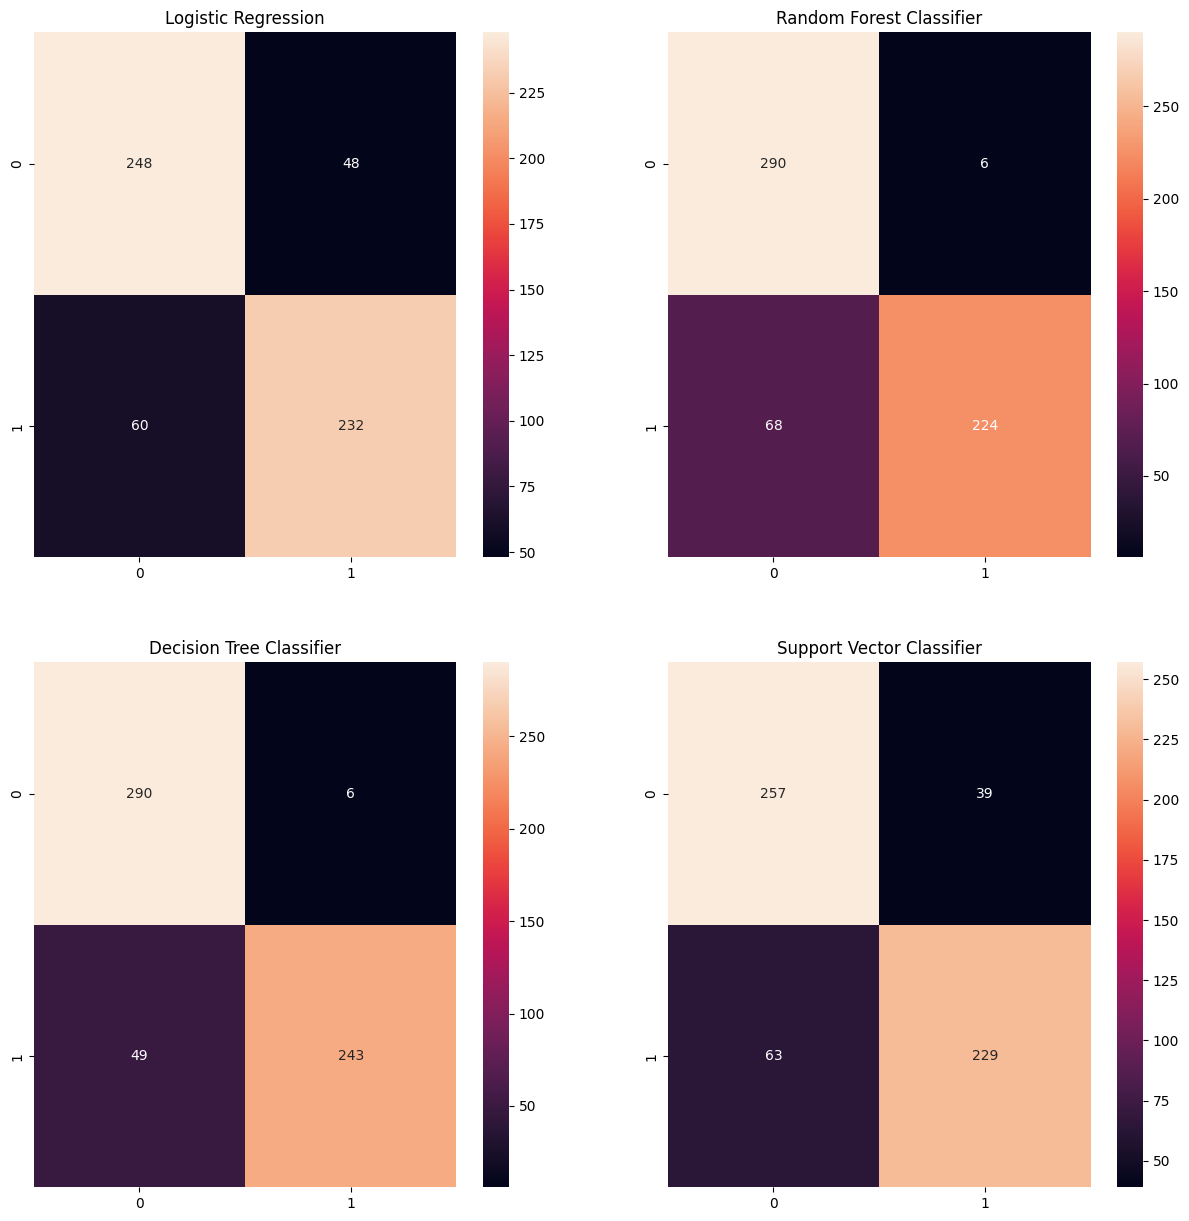

In [ ]:
from sklearn.metrics import confusion_matrix
fig, ax = plt.subplots(2, 2, figsize=(15, 15))

#confusion matrix for logistic regression
cm = confusion_matrix(y_test, lr_pred)
sns.heatmap(cm, annot=True, ax = ax[0,0], fmt='g').set_title('Logistic Regression')

#confusion matrix for random forest
cm = confusion_matrix(y_test, rfc_pred)
sns.heatmap(cm, annot=True, ax = ax[0,1], fmt='g').set_title('Random Forest Classifier')

#confusion matrix for decision tree
cm = confusion_matrix(y_test, dtree_pred)
sns.heatmap(cm, annot=True, ax = ax[1,0], fmt='g').set_title('Decision Tree Classifier')

#confusion matrix for support vector classifier
cm = confusion_matrix(y_test, svc_pred)
sns.heatmap(cm, annot=True, ax = ax[1,1], fmt='g').set_title('Support Vector Classifier')

### Model Accuracy

Text(0.5, 1.0, 'Model Accuracy')

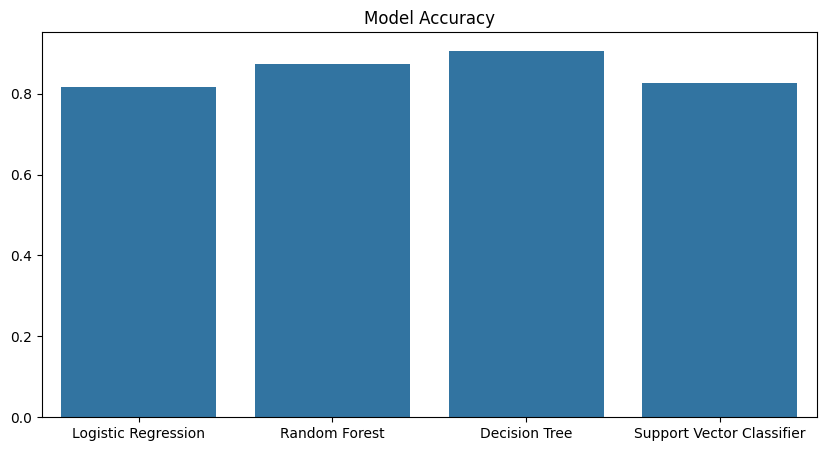

In [ ]:
#Bar chart for the accuracy of the models
from sklearn.metrics import accuracy_score
models = ['Logistic Regression', 'Random Forest', 'Decision Tree', 'Support Vector Classifier']
accuracy = [accuracy_score(y_test, lr_pred), accuracy_score(y_test, rfc_pred), accuracy_score(y_test, dtree_pred), accuracy_score(y_test, svc_pred)]
plt.figure(figsize=(10,5))
sns.barplot(x=models, y=accuracy).set_title('Model Accuracy')

### Model Metrics

Text(0.5, 1.0, 'R2 Score')

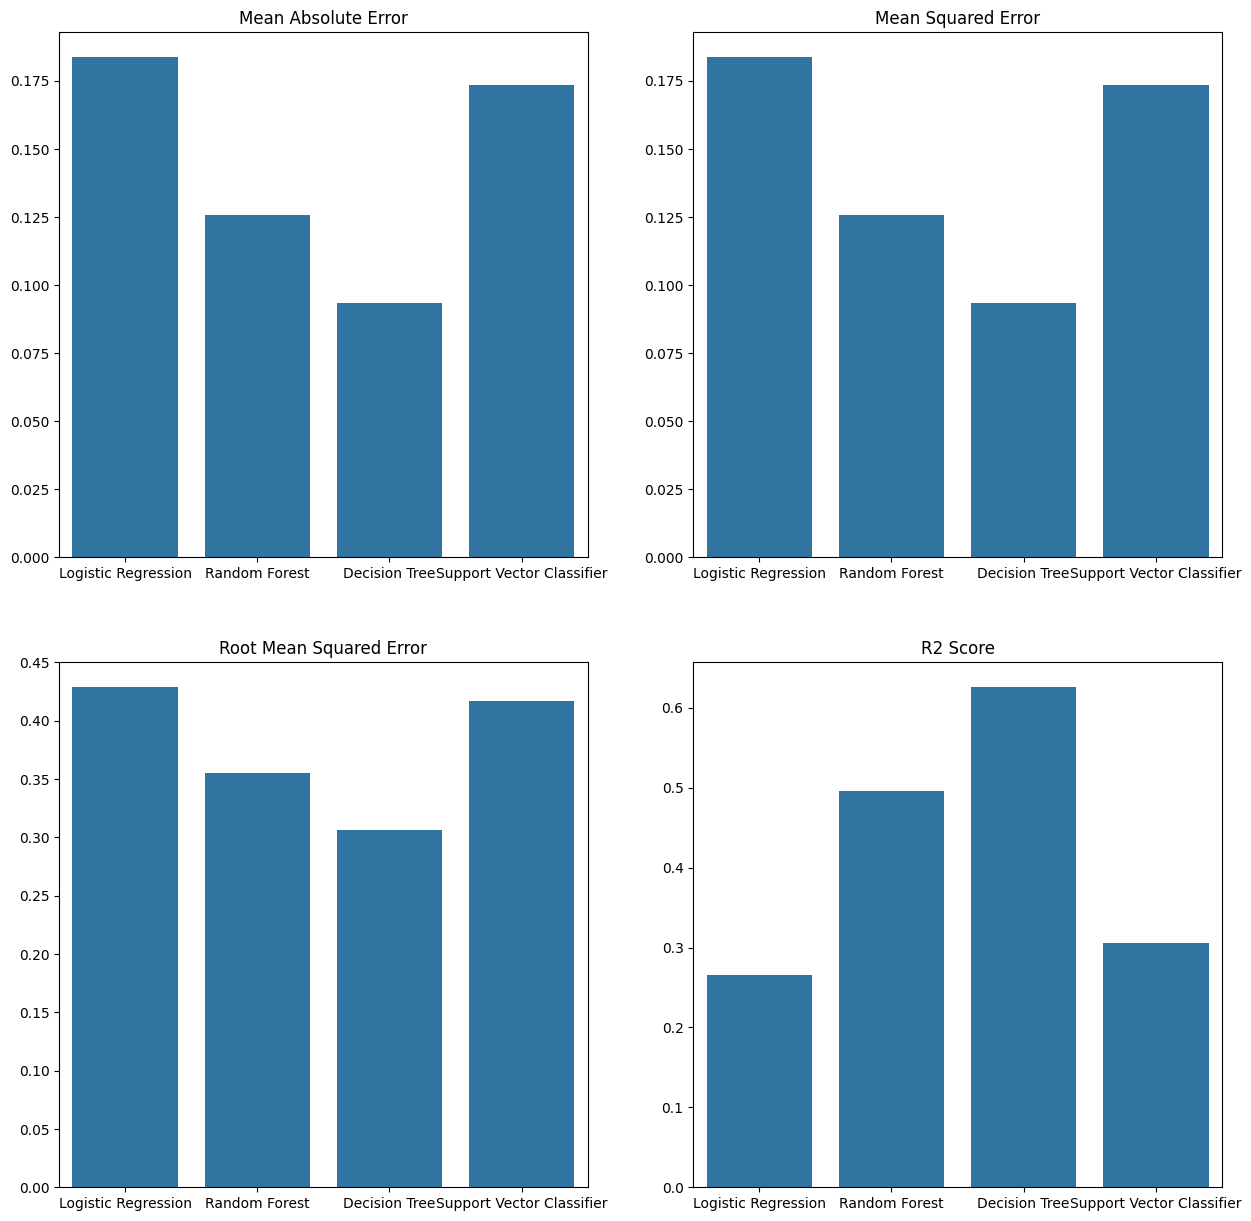

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error

fig, ax = plt.subplots(2,2, figsize=(15, 15))
models = ['Logistic Regression', 'Random Forest', 'Decision Tree', 'Support Vector Classifier']
mae = [mean_absolute_error(y_test, lr_pred), mean_absolute_error(y_test, rfc_pred), mean_absolute_error(y_test, dtree_pred), mean_absolute_error(y_test, svc_pred)]
mse = [mean_squared_error(y_test, lr_pred), mean_squared_error(y_test, rfc_pred), mean_squared_error(y_test, dtree_pred), mean_squared_error(y_test, svc_pred)]
rmse = [np.sqrt(mean_squared_error(y_test, lr_pred)), np.sqrt(mean_squared_error(y_test, rfc_pred)), np.sqrt(mean_squared_error(y_test, dtree_pred)), np.sqrt(mean_squared_error(y_test, svc_pred))]
r2 = [r2_score(y_test, lr_pred), r2_score(y_test, rfc_pred), r2_score(y_test, dtree_pred), r2_score(y_test, svc_pred)]

#Mean Absolute Error
sns.barplot(x=models, y=mae, ax=ax[0,0]).set_title('Mean Absolute Error')

#Mean Squared Error
sns.barplot(x=models, y=mse, ax=ax[0,1]).set_title('Mean Squared Error')

#Root Mean Squared Error
sns.barplot(x=models, y=rmse, ax=ax[1,0]).set_title('Root Mean Squared Error')

#R2 Score
sns.barplot(x=models, y=r2, ax=ax[1,1]).set_title('R2 Score')

## Feature Importance Analysis

Text(0.5, 1.0, 'Feature Importance for Support Vector Classifier')

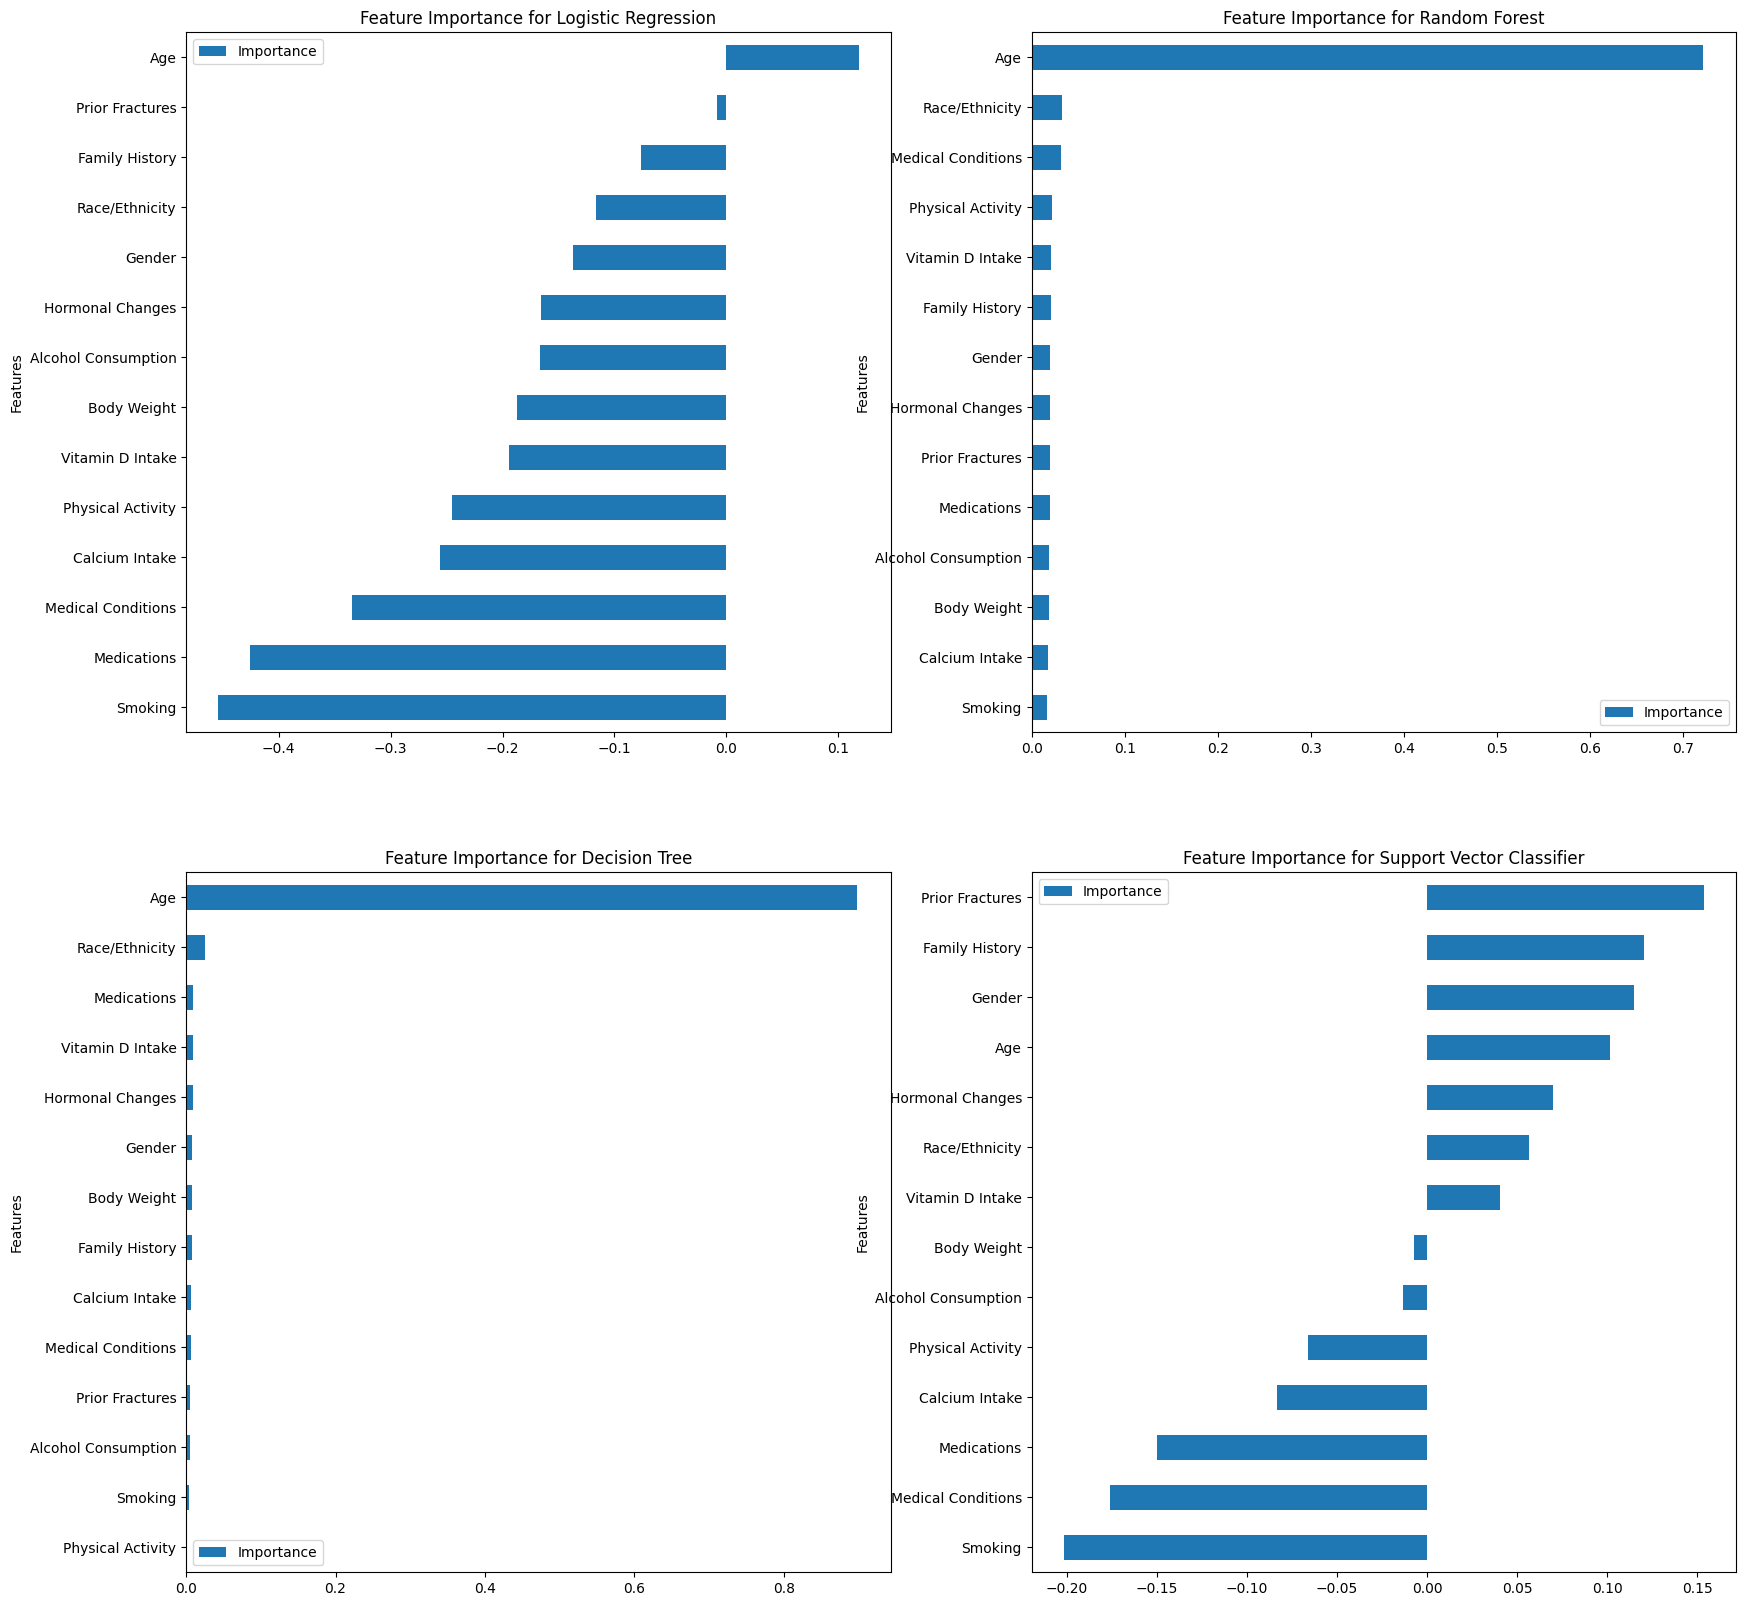

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(20, 20))

#Feature Importance graph for Logistic Regression
coeff = list(logmodel.coef_[0])
labels = list(df.drop('Osteoporosis',axis=1).columns)
features = pd.DataFrame()
features['Features'] = labels
features['Importance'] = coeff
features.sort_values(by=['Importance'], ascending=True, inplace=True)
features = features.set_index('Features')
features.plot(kind='barh', ax=ax[0,0]).set_title('Feature Importance for Logistic Regression')

#Feature Importance graph for Random Forest
coeff = list(rfc.feature_importances_)
labels = list(df.drop('Osteoporosis',axis=1).columns)
features = pd.DataFrame()
features['Features'] = labels
features['Importance'] = coeff
features.sort_values(by=['Importance'], ascending=True, inplace=True)
features = features.set_index('Features')
features.plot(kind='barh', ax=ax[0,1]).set_title('Feature Importance for Random Forest')

#Feature Importance graph for Decision Tree
coeff = list(dtree.feature_importances_)
labels = list(df.drop('Osteoporosis',axis=1).columns)
features = pd.DataFrame()
features['Features'] = labels
features['Importance'] = coeff
features.sort_values(by=['Importance'], ascending=True, inplace=True)
features = features.set_index('Features')
features.plot(kind='barh', ax=ax[1,0]).set_title('Feature Importance for Decision Tree')

#Feature Importance graph for Support Vector Classifier
coeff = list(svc.coef_[0])
labels = list(df.drop('Osteoporosis',axis=1).columns)
features = pd.DataFrame()
features['Features'] = labels
features['Importance'] = coeff
features.sort_values(by=['Importance'], ascending=True, inplace=True)
features = features.set_index('Features')
features.plot(kind='barh', ax=ax[1,1]).set_title('Feature Importance for Support Vector Classifier')

## Conclusion

In this project, I developed machine learning models to predict the risk of osteoporosis in patients based on their medical records. I analyzed the dataset, performed exploratory data analysis, and developed predictive models using logistic regression, random forest classifier, decision tree classifier, and support vector classifier. I evaluated the models using confusion matrix, accuracy, precision, recall, and F1 score metrics.

From the exploratory data analysis, i have found that certain factors like Age, Hormona Changes, Medical Conditions, Medications, Lifestyle and nutrition are responsible for the risk of osteoporosis. Patients between 20-40 years of age have lower risk of osteoporosis. Patients who have undergone hormonal changes, have medical conditions, consume medications, have lower body weight, calcium and vitamin D levels, and have sedentary lifestyle have higher risk of osteoporosis.

Coming to the machine learning models, I have employed Logistic Regression, Random Tree, Decision Tree and Support Vector Classifier to predict the risk of osteoporosis based on the data. Out of these models, Decision Tree Classifier model gave the best results in comparison to others, with nearly 87% accuracy. The model can be used to predict the risk of osteoporosis in patients based on their medical records, enabling early intervention and prevention strategies.